In [ ]:
"""
Purpose: To be able and validate when a 
branch splits off into 2 branches and 
whether or not this is valid


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-07-06 20:22:40,274 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 20:22:40,275 - settings - Setting database.user to celiib
INFO - 2021-07-06 20:22:40,276 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 20:22:40,277 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 20:22:40,278 - settings - Setting database.user to celiib
INFO - 2021-07-06 20:22:40,278 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 20:22:40,282 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-07-06 20:22:40,869 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 20:22:40,927 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 20:22:40,931 - settings - Setting database.user to celiib
INFO - 2021-07-06 20:22:40,932 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 20:22:40,933 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 20:22:41,606 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 20:22:41,664 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 20:22:41,665 - settings - Setting database.user to celiib
INFO - 2021-07-06 20:22:41,666 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 20:22:41,666 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 20:22:41,667 - settings - Setting database.user to celiib
INFO - 2021-07-06 20:22:41,667 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-07-06 20:22:42,312 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-06 20:22:42,313 - settings - Setting database.user to celiib
INFO - 2021-07-06 20:22:42,314 - settings - Setting database.password to newceliipass
INFO - 2021-07-06 20:22:42,319 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-06 20:22:42,896 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
import concept_network_utils as cnu
import neuron_statistics as nst

# Pulling Down a Neuron

In [5]:
segment_id = 864691135212632448

In [6]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [7]:
minnie.DecompositionCellType()& dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,allen_e_i,allen_e_i_n_nuc,allen_cell_type,allen_cell_type_n_nuc,allen_cell_type_e_i,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,cell_type_for_axon,axon_volume volume of the oriented bounding box of axon (divided by 10^14),axon_length length (in um) of the classified axon skeleton,axon_branch_length_median length (in um) of the classified axon skeleton,axon_branch_length_mean length (in um) of the classified axon skeleton,axon_n_branches,axon_n_short_branches,axon_n_long_branches,axon_n_medium_branches,axon_bbox_x_min,axon_bbox_y_min,axon_bbox_z_min,axon_bbox_x_max,axon_bbox_y_max,axon_bbox_z_max,axon_bbox_x_min_soma_relative,axon_bbox_y_min_soma_relative,axon_bbox_z_min_soma_relative,axon_bbox_x_max_soma_relative,axon_bbox_y_max_soma_relative,axon_bbox_z_max_soma_relative,run_time the amount of time to run (seconds)
864691135212632448,0,0.25,30.00,7,0,0,6,=BLOB=,301095,1186.5,1,1,excitatory,densely_spined,1,1,169.19782551666762,0.0004730579787217253,0,3361786.307754809,98,4361480.96279547,excitatory,1,5P_IT,1,excitatory,0.0,0.0,excitatory,103.74924817914972,2245.668874429093,6.540861338220179,12.204722143636376,184,88,1,95,650779.2555368412,679588.4768641673,723513.567330264,833718.6664819184,915465.8638145905,963945.071757931,-90725.57701373694,-61087.37313583854,-127024.11600307119,92213.83393134025,174790.0138145847,113407.38842459582,450.7


In [8]:
neuron_obj = neuron_objs[0]

# Proofread the Neuron to get some instances of 1 degree branching

In [10]:
import validation_utils as vu
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = 301095,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=0)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {'L4': array([ 16,  17,  19,  18,  29,  33,  41,  28,  44,  34,  54,   0,  56,
        58,  50,  73,  64,  74,  93,  94, 112, 114, 117, 157, 162, 163,
       175, 177, 178, 179, 172, 176])}
Recieved another instance of Neuron class in init -- so just copying data



 ---- Total time for applying filter: 140.77436208724976 -----

--- Finished Part 1: Filtering Neuron -----

---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 3779 
# of presyn: 416
# of postsyn: 3363

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 82
# of valid_syn_idx = 334
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
#

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,
               filt_neuron.axon_limb_idx)

# Testing Low Degree Filters

Recieved another instance of Neuron class in init -- so just copying data
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Performing Edge Query
After edge filter, # of rows = 2

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   8  55     19.15   19.065913               0.254490              0.000068   
1   8   9    127.29   24.754848               0.493486              0.000126   
2  55   9     34.87    5.688935               0.113409              0.000057   

   n_synapses_diff  
0                3  
1                5  
2                2  
Afer Local query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   8  55     19.15   19.065913               0.254490              0.000068   
1  55   9     34.87    5.688935               0.113409              0.000057   

   n_synapses_diff 

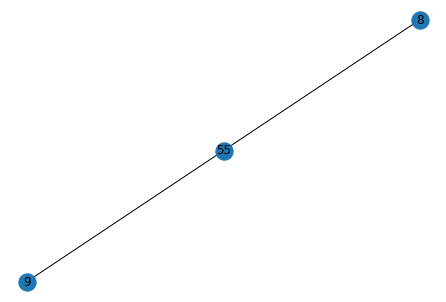

Performing global features query
Performing Edge Query
After edge filter, # of rows = 2
for upstream node 9, winning_node = None, error_branches = [ 8 55]
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Performing Edge Query
After edge filter, # of rows = 2

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  16  31     21.97    7.104051               0.085180              0.000105   
1  16  20    153.98   31.762648               0.615103              0.000105   
2  31  20     15.55   38.866699               0.752677              0.000000   

   n_synapses_diff  
0                2  
1                2  
2                0  
Afer Local query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  16  31     21.97    7.104051               0.085180              0.000105   
1  31  20     15.55

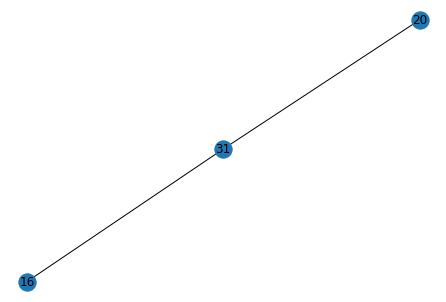

Performing global features query
Performing Edge Query
After edge filter, # of rows = 1
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Performing Edge Query
After edge filter, # of rows = 1

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  51    116.06    2.093481               0.033034              0.000067   
1  10  52     13.52    4.638695               0.068204              0.000009   
2  51  52     73.25    6.732176               0.098986              0.000076   

   n_synapses_diff  
0                0  
1                1  
2                1  
Afer Local query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  52     13.52    4.638695               0.068204              0.000009   

   n_synapses_diff  
0                1  


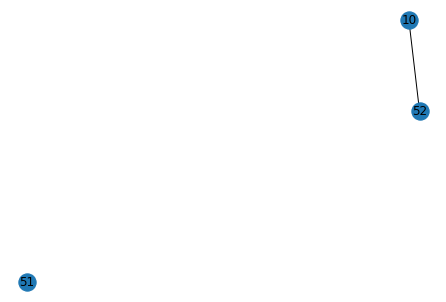

Performing global features query
Performing Edge Query
After edge filter, # of rows = 1
for upstream node 52, winning_node = 10, error_branches = [51]
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Performing Edge Query
After edge filter, # of rows = 2

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  74  75    125.66    1.066107               0.015437              0.000408   
1  74  59     53.27   10.782057               0.185006              0.000408   
2  75  59      9.33    9.715950               0.166713              0.000000   

   n_synapses_diff  
0                1  
1                1  
2                0  
Afer Local query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  74  59     53.27   10.782057               0.185006              0.000408   
1  75  59      9.33    

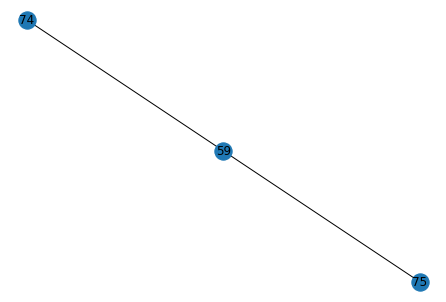

Performing global features query
Performing Edge Query
After edge filter, # of rows = 1
for upstream node 59, winning_node = 75, error_branches = [74]
limb_branch_dict_to_cancel = {'L4': array([ 8, 55, 16, 31, 51, 74])}


Branches Requested to Remove (WITH disconnect effect)
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh
No Synapses to plot


Recieved another instance of Neuron class in init -- so just copying data

---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 3779 
# of presyn: 416
# of postsyn: 3363

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 110
# of valid_syn_idx = 306
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 24
# of valid_syn_idx = 3339

---Step 4: add_error_synapses_to_neuron_obj---
Working on error_type = distance_errored
Working on error_type = mesh_errored
Total time for valid synapse objects = 0.004208564758300781

--- Limb L0 soma calculation time = 1.11

--- Limb L1 soma calculation time = 0.654

--- Limb L2 soma calculation time = 0.299

--- Limb L3 soma calculation time = 0.286

--- Limb L4 soma calculation time = 0.863

--- Limb L5 soma calculation time = 0.44

--- Limb L6 soma calculation time = 0.463
P

In [15]:
import validation_utils as vu
(filt_neuron_2,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_low_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = True,
                                verbose = False,
                                plot_score=False,
                                nucleus_id = 301095,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=0)

# Low Branch Function

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   filt_neuron.axon_limb_name)

In [ ]:
import neuron_searching as ns
ns.query_neuron(filt_neuron,
               functions_list=[ns.n_synapses,ns.n_downstream_nodes],
            query="(n_synapses > 0) and (n_downstream_nodes == 1)")

In [ ]:
import axon_utils as au
axon_spines_limb_branch_dict = au.axon_spines_limb_branch_dict(filt_neuron)
short_thick_endnodes_to_remove_limb_branch = au.short_thick_branches_limb_branch_dict(filt_neuron)
ax_name = filt_neuron.axon_limb_name       
axon_spines = axon_spines_limb_branch_dict[ax_name]
short_thick_endnodes = short_thick_endnodes_to_remove_limb_branch[ax_name]
filt_neuron[ax_name].axon_spines = axon_spines
filt_neuron[ax_name].short_thick_endnodes = short_thick_endnodes  



In [ ]:
print(f"nodes_to_exclude = {filt_neuron[ax_name].nodes_to_exclude}")

In [ ]:
nst.skeletal_length_upstream_total?

In [ ]:
import error_detection as ed
upstream_branch = 65
#upstream_branch = 33
upstream_branch = 70
upstream_branch = 81

limb_obj = filt_neuron[ax_name]
G = ed.low_degree_upstream_match(
    limb_obj=limb_obj,
    branch_idx=upstream_branch,
    filters_to_run = None, # provides a list of all the checks you want to run
    
    #--- Phase A: arguments for determining downstream nodes ------
    skip_distance = 0,#3000,
    min_upstream_skeletal_distance = 2000,
    remove_short_thick_endnodes = True,
    short_thick_endnodes_to_remove = filt_neuron[ax_name].short_thick_endnodes,
    axon_spines = filt_neuron[ax_name].axon_spines,
    
    # helps determine the max degrees to resolve
    width_func = au.axon_width,
    max_degree_to_resolve = 3,
    #max_width_to_resolve = None,
    
    # parameter checking to see if high degree resolve can be used
    width_max = 170,
    axon_dependent = True,
    
    plot_starting_branches = True,
    plot_extracted_skeletons = False,
    
    plot_G_local_edge = True,
    verbose = True,
    )

In [ ]:
import networkx_utils as xu
xu.edge_df(G,with_node_attributes=True)

# A) Axon Filter

In [ ]:
import graph_filters as gf
gf.axon_webbing_filter(G,
                           limb_obj,
                           verbose = True,
                       parent_width_maximum=110,
                           child_angle_max=150,
                           child_width_maximum=100,
                       child_skeletal_threshold = 2000,
                              web_size_threshold = 500)

# B) Axon Spines at Intersection

In [ ]:
gf.axon_spine_at_intersection_filter(G,
                                      limb_obj = filt_neuron.axon_limb,
                                    attempt_upstream_pair_singular = True,
                                    verbose = True,
                                   **dict())

# C) Distance of Closest Synapse

In [ ]:
gf.min_synapse_dist_to_branch_point_filter(G,
                                       limb_obj,
                                       verbose=True)

# D) Fork Divergence Filter

In [ ]:
divergence_threshold_mean = 160
downstream_width_max = 90
upstream_width_max = 90

In [ ]:
gf.fork_divergence_filter(G,
                      limb_obj,
                      #arguments for the motif search
                    downstream_width_max = 100,
                    upstream_width_max = 110,
                      total_downstream_skeleton_length_threshold = 4000,
                individual_branch_length_threshold = 3000,

                      #for the fork divergence


                      divergence_threshold_mean = 160,

                       attempt_upstream_pair_singular = True,
                    verbose = True,)

# E) Doubling Back

In [ ]:
#for axon thin threshold
double_back_threshold=135
au.axon_thick_threshold 
# comparison_distance = 1000
# offset = 0
branch_skeletal_length_min = 4000
upstream_skeletal_length_min = 5000


# thick threshold
axon_width_threshold = au.axon_thick_threshold
axon_width_threshold_max = au.axon_ais_threshold
double_back_threshold=120
branch_skeletal_length_min = 4000

In [ ]:
gf.axon_double_back_filter(G,limb_obj,
                          verbose = True)

# F) Thick T Crossing

In [ ]:
gf.thick_t_filter(G,limb_obj,verbose = True,
               parent_width_maximum = 110,
              child_angle_max=140,
              )